In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import scipy, scipy.stats
import math
from collections import Counter
%matplotlib inline

In [92]:
df=pd.read_csv('climate_change.csv')

In [48]:
df.head()
df[df['Year']<2007].count()

Year        284
Month       284
MEI         284
CO2         284
CH4         284
N2O         284
CFC-11      284
CFC-12      284
TSI         284
Aerosols    284
Temp        284
dtype: int64

In [12]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [13]:
df.shape

(308, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


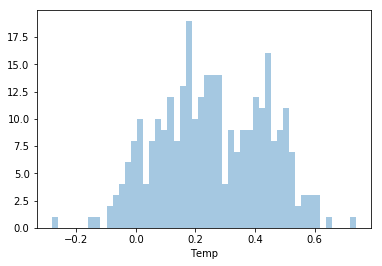

In [27]:
sns.distplot(df['Temp'],kde=False,bins=50);
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64

In [39]:
df.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [40]:
from sklearn.model_selection import train_test_split

In [93]:
x_train=df[df['Year']<=2006]

In [94]:
x_train.head(2)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118


In [95]:
x_test=df[df['Year']>2006]

In [96]:
x_test.head(2)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
284,2007,1,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,2007,2,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498


In [112]:
y_train=x_train['Temp']

In [99]:
y_test=x_test['Temp']

In [100]:
x=x_train[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]

In [101]:
x1=x_test[['MEI','CO2','CH4','N2O','CFC-11','CFC-12','TSI','Aerosols']]

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm=LinearRegression()

In [104]:
lm.fit(x,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
print('train data B0',lm.intercept_)
print('train data Betas',lm.coef_)

train data B0 -124.59426040111438
train data Betas [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]


In [115]:
from sklearn import metrics
pred=lm.predict(x)

In [108]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.1837783533313837

In [117]:
r2_score(y_train,pred)

0.7508932770523417

In [118]:
from statsmodels.api import add_constant

In [120]:
x2=add_constant(x)

In [121]:
lm_new=sm.OLS(y_train,x2)

In [122]:
lm2=lm_new.fit()

In [123]:
lm2.pvalues

const       1.431046e-09
MEI         4.898887e-20
CO2         5.052521e-03
CH4         8.101456e-01
N2O         5.466931e-02
CFC-11      5.957288e-05
CFC-12      2.097199e-04
TSI         1.095945e-09
Aerosols    5.411273e-12
dtype: float64

In [124]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.94e-78
Time:                        08:21:07   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -124.5943     19.887     -6.265      0.0

In [125]:
x.head()
train data B0 -124.59426040111438
train data Betas [ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


In [128]:
x_new=x_train[['MEI','N2O','TSI','Aerosols']]

In [136]:
x_test.head()
x_test_2=x_test[['MEI','N2O','TSI','Aerosols']]

In [130]:
lm_new=LinearRegression()

In [131]:
lm_new.fit(x_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
print(lm_new.coef_)

[ 0.06418576  0.02531975  0.07949028 -1.70173707]


In [133]:
pred_new=lm_new.predict(x_new)

In [134]:
r2_score(y_train,pred_new)

0.726132127951111

In [138]:
pred_rev=lm_new.predict(x_test_2)

In [142]:
r2_score(y_test,pred_rev)

-0.10237639062709314